In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

C:\Users\Jrp01\AppData\Local\Temp\ipykernel_23412\1652790876.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
print(base.classes.keys())

['station', 'measurement']


In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()

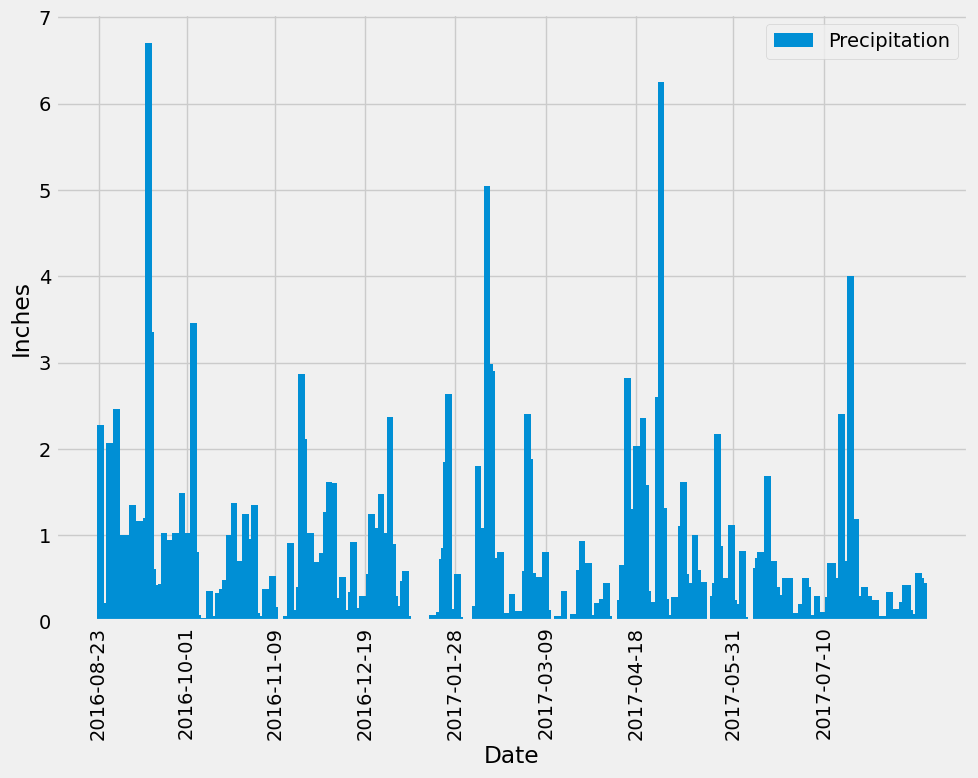

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_year_data = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= recent_year_data).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('date') 

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 8))  # Adjust the figure size
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], label='Precipitation', width=3)
plt.xlabel('Date')
plt.ylabel('Inches')
specific_dates = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', 
    '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.xticks(pd.to_datetime(specific_dates), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# Calculate the summary statistics for the precipitation data using Pandas
precipitation_summary = precipitation_df['precipitation'].describe()
print(precipitation_summary)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)) \
    .group_by(measurement.station) \
    .order_by(func.count(measurement.station).desc()) \
    .all()

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0]
temperature_stats = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs)).filter(measurement.station == most_active_station_id).all()
lowest_temp, highest_temp, average_temp = temperature_stats[0]


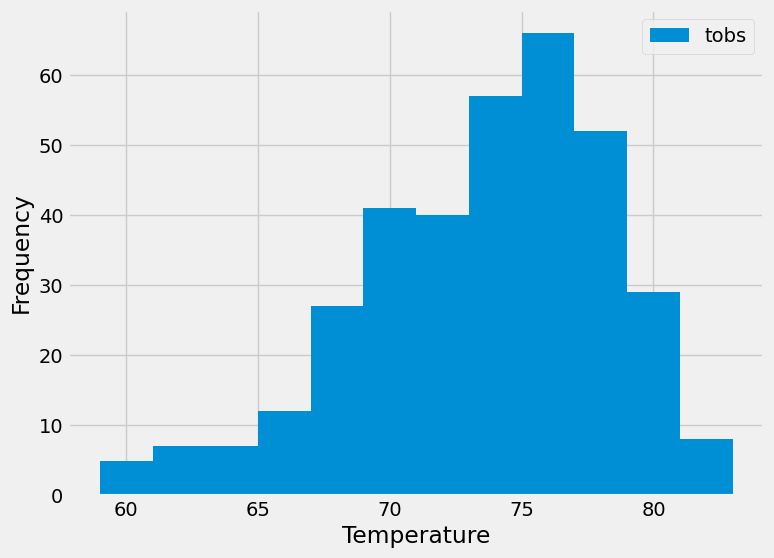

In [15]:
# Using the most active station id
most_recent_date = session.query(func.max(measurement.date)).scalar()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs).filter(
    measurement.station == most_active_station_id,
    measurement.date >= recent_year_data
).all()

# Convert the results to temperatures
temperature_list = [temp[0] for temp in temperature_data]

# Plot the temperature observations as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_list, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()